## List of systematics

inputEventsH
nWeightedEvents
TauCheck
GenTauCheck

#### TES
* TauCheck_CMS_shape_t_1prong_13TeV

* TauCheck_CMS_shape_t_1prong1pi0_13TeV

* TauCheck_CMS_shape_t_3prong_13TeV

#### DY
* TauCheck_CMS_shape_dyShape_13TeV

#### top
* TauCheck_topPtWeight

#### MET
* TauCheck_CMS_met_boson_resolution_13TeV

* TauCheck_CMS_met_boson_response_13TeV

#### JES
* TauCheck_CMS_scale_j_FlavorQCD13TeV

* TauCheck_CMS_scale_j_RelativeBal13TeV

* TauCheck_CMS_scale_j_HF13TeV

* TauCheck_CMS_scale_j_BBEC113TeV

* TauCheck_CMS_scale_j_EC213TeV

* TauCheck_CMS_scale_j_Absolute13TeV

* TauCheck_CMS_scale_j_Absolute_201813TeV

* TauCheck_CMS_scale_j_HF_201813TeV

* TauCheck_CMS_scale_j_EC2_201813TeV

* TauCheck_CMS_scale_j_RelativeSample_201813TeV

* TauCheck_CMS_scale_j_BBEC1_201813TeV

In [1]:
from SystExplorer import SystExplorer
import uproot

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
# sns.set(rc={'figure.figsize':(13.7,8.27)})

In [2]:
systematic_to_vars = {
               'TauCheck_CMS_shape_dyShape_13TeV'        : ['zptweight'],
               'TauCheck_CMS_met_boson_resolution_13TeV' : ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_met_boson_response_13TeV'   : ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_scale_j_RelativeBal13TeV'   : ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'],
               'TauCheck_CMS_scale_j_Absolute_201813TeV' : ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'],
               'TauCheck_CMS_shape_t_1prong_13TeV'       : ['pt_2', 'puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_shape_t_1prong1pi0_13TeV'   : ['pt_2', 'puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
#                'TauCheck_CMS_shape_t_3prong_13TeV'       : ['pt_2', 'puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'], 
}

In [3]:
var_to_range_nbins = {
                    'zptweight': ([0, 1], 20),
    
                    'puppimet': ([0, 100], 10),
                    'puppimetphi': ([-3.15, 3.15], 20),
                    'puppimt_1': ([0, 60], 20),
    
                    'pt_tt': ([0, 200], 20),
                    'pt_2': ([20, 100], 20),
    
                    'mjj': ([0, 1000], 20),
                    'jdeta': ([-10, 10], 20),
                    'jpt_1': ([0, 200], 20),
                    'jpt_2': ([0, 100], 20),
                    'bpt_1': ([0, 200], 20),
                    'bpt_2': ([0, 200], 20),
                    'njets': ([0, 8], 8),
                    'nbtag': ([0, 4], 4),    
}


In [4]:
path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework'

# out_plots_path = path + '/systematics_bugged_plots/DY'
# file_name = 'DYJetsToLL_M-50_bugged.root'
# # out_plots_path = path + '/systematics_bugged_plots/Embedded'
# # file_name = 'Embedded_Run2018_bugged.root'

out_plots_path = path + '/systematics_plots/DY'
file_name = 'DYJetsToLL_M-50.root'
# out_plots_path = path + '/systematics_plots/Embedded'
# file_name = 'Embedded_Run2018.root'

## plotting loop

In [26]:
explorer = SystExplorer(f'{path}/{file_name}')
explorer.set_central_tree('TauCheck')

In [27]:
# explorer.print_file_content()

In [28]:
for systematic_tree_name, branches in systematic_to_vars.items():
    explorer.set_updown_trees(systematic_tree_name)
    explorer.set_dataframes(branches=branches)
    for var_name in branches:
        var_range, nbins = var_to_range_nbins[var_name]
        explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)
        explorer.plot_var_ratio_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)

/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:86: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:87: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:86: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:87: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:86: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:87: RuntimeWarning: invalid value encountered in true_divid

## detailed studies

### puppimet_x(y)

In [5]:
explorer = SystExplorer(f'{path}/{file_name}')
explorer.set_central_tree('TauCheck')
# explorer.print_file_content()

In [6]:
systematic_tree_name = 'TauCheck_CMS_met_boson_resolution_13TeV'
branches = (['pt_2'] + ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'] + 
            ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'])
var_range, nbins = ([-100, 100], 80)

In [6]:
explorer = SystExplorer(f'{path}/{file_name}')
explorer.set_central_tree('TauCheck')
explorer.set_updown_trees(systematic_tree_name)
explorer.set_dataframes(branches)

In [7]:
data = explorer.data_central
data_up = explorer.data_up
data_down = explorer.data_down

In [8]:
data.puppimt_1.max()

59.999805



Looking into systematic: TauCheck_CMS_met_boson_resolution_13TeV
plotting up/down shifts for variable: puppimet_y




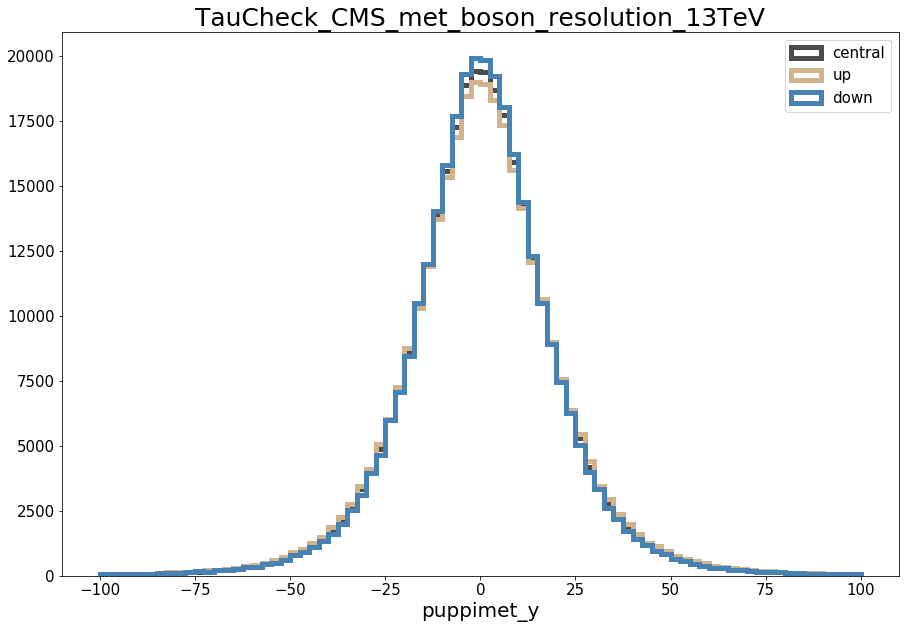

In [10]:
explorer.data_central['puppimet_x'] = data.puppimet * np.cos(data.puppimetphi)
explorer.data_central['puppimet_y'] = data.puppimet * np.sin(data.puppimetphi)
explorer.data_up['puppimet_x'] = data_up.puppimet * np.cos(data_up.puppimetphi)
explorer.data_up['puppimet_y'] = data_up.puppimet * np.sin(data_up.puppimetphi)
explorer.data_down['puppimet_x'] = data_down.puppimet * np.cos(data_down.puppimetphi)
explorer.data_down['puppimet_y'] = data_down.puppimet * np.sin(data_down.puppimetphi)

var_name = 'puppimet_y'
explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=None, verbose=True, save_plot=False)

In [11]:
explorer.print_mean_variance_shifts('puppimet_x')

Mean, Variance for puppimet_x:

central: (0.5876581, 512.29663)
up: (0.6066989, 534.9276)
down: (0.56861734, 490.69772)


### puppimt_1

In [17]:
systematic_tree_name = 'TauCheck_CMS_met_boson_resolution_13TeV'
branches = ['puppimt_1', 'pt_tt']
var_range, nbins = ([0, 70], 10)
var_name = 'puppimt_1'

In [12]:
explorer.set_updown_trees(systematic_tree_name)
explorer.set_dataframes(branches)



Looking into systematic: TauCheck_CMS_met_boson_resolution_13TeV
plotting up/down shifts for variable: puppimt_1




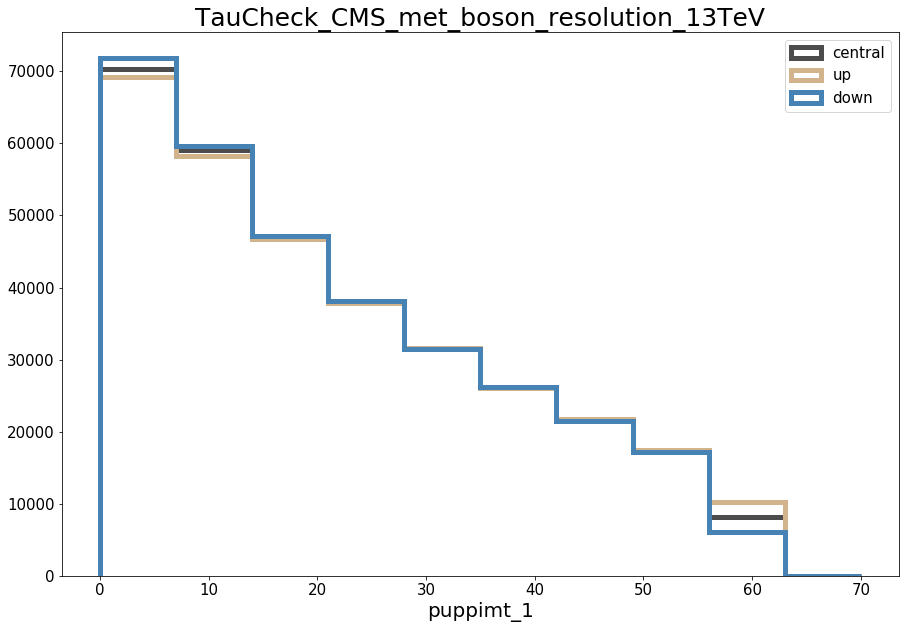

In [18]:
explorer.plot_var_shifts(var_name, var_range, nbins, verbose=True, save_plot=False)



Looking into systematic: TauCheck_CMS_met_boson_resolution_13TeV
plotting up(down)/central ratio for variable: puppimt_1




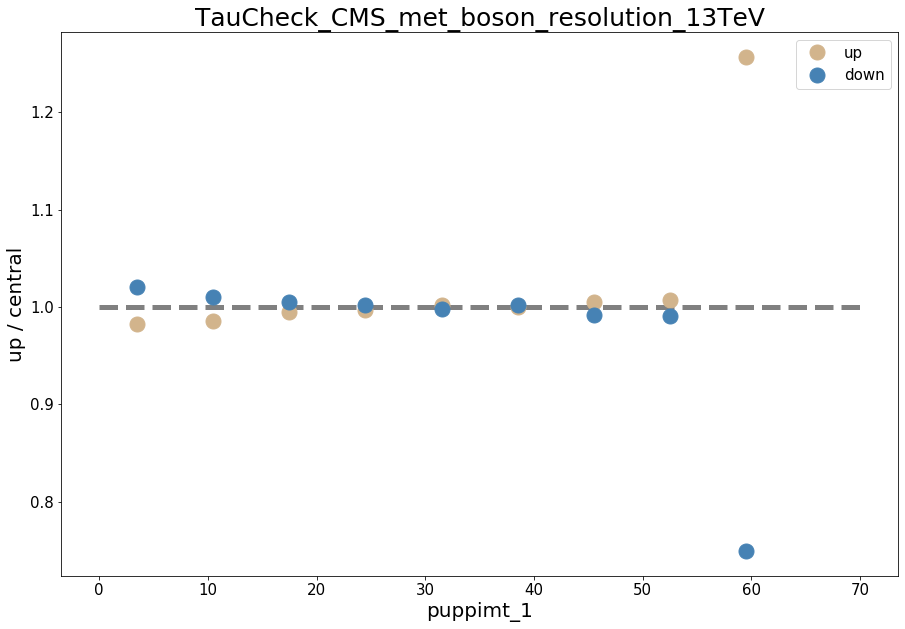

In [19]:
explorer.plot_var_ratio_shifts(var_name, var_range, nbins, verbose=True, save_plot=False)

In [19]:
data.puppimt_1.max(), data_up.puppimt_1.max(), data_down.puppimt_1.max()

(59.999805, 69.410446, 63.085846)

In [20]:
data.puppimt_1.min(), data_up.puppimt_1.min(), data_down.puppimt_1.min()

(0.0001479921, 0.00016879127, 1.11038e-05)

In [30]:
sum(data_up.puppimt_1 > 61)

526

### DY

In [20]:
systematic_tree_name = 'TauCheck_CMS_shape_dyShape_13TeV'
branches = ['zptweight',]
var_range, nbins = ([-100, 100], 80)
var_name = 'zptweight'

In [21]:
explorer.set_updown_trees(systematic_tree_name)
explorer.set_dataframes(branches)

In [22]:
np.unique(explorer.data_down.zptweight)

array([1.])

### misc.

In [7]:
explorer = SystExplorer(f'{path}/{file_name}')
explorer.set_central_tree('TauCheck')

In [23]:
systematic_tree_name = 'TauCheck_CMS_scale_j_FlavorQCD13TeV'
branches = ['jdeta']
var_range, nbins = ([-10, 9], 19)
var_name = 'jdeta'

In [13]:
explorer.set_updown_trees(systematic_tree_name)
explorer.set_dataframes(branches)



Looking into systematic: TauCheck_CMS_scale_j_FlavorQCD13TeV
plotting up(down)/central ratio for variable: jdeta




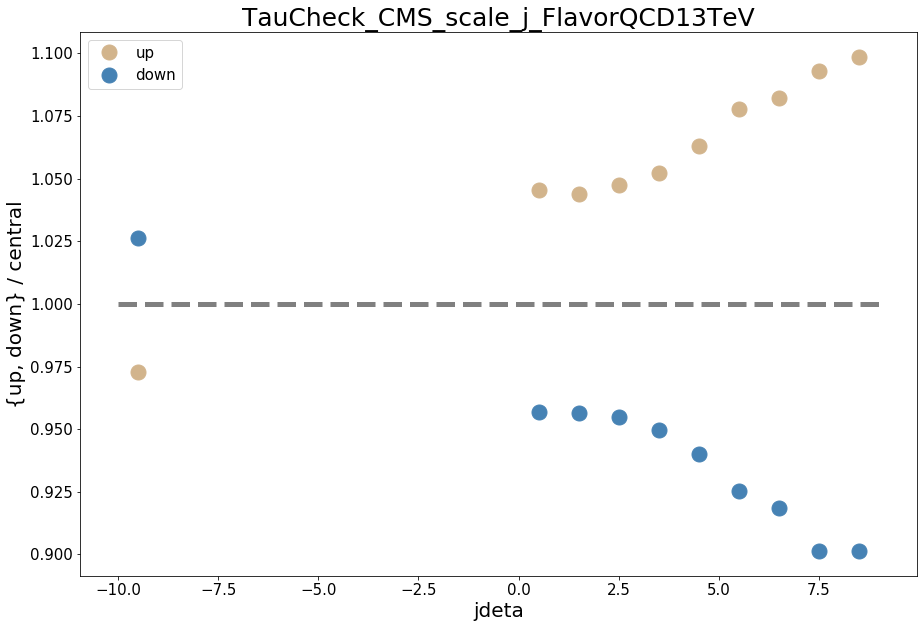

In [24]:
explorer.plot_var_ratio_shifts(var_name, var_range, nbins, normalise=False, verbose=True, save_plot=False)

In [15]:
data = explorer.data_central

In [19]:
sum(data.jdeta > 8)

221

In [20]:
data.jdeta.max()

9.242559